# Main Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_10x = os.path.join("..", "clean-files", "aggr", "agg-cb-10.csv")
cf_10x = os.path.join("..", "clean-files", "aggr", "agg-cb-10-1.csv")
cb_1x = os.path.join("..", "clean-files", "aggr", "agg-cb-1.csv")
cf_1x = os.path.join("..", "clean-files", "aggr", "agg-cb-1-1.csv")

# Calculations for every file

#### 1x Scenarios

In [4]:
# Read content of the file
df_cb_1 = pd.read_csv(cb_1x)
df_cf_1 = pd.read_csv(cf_1x)

#### 10x Scenarios

In [5]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (Mbps)"] = df_ue["Mean_Throughput"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_10 = read_data_by_ue(cb_10x)
dfs_cf_10 = read_data_by_ue(cf_10x)

# Behavior Graphics 

## 1X Scenarios

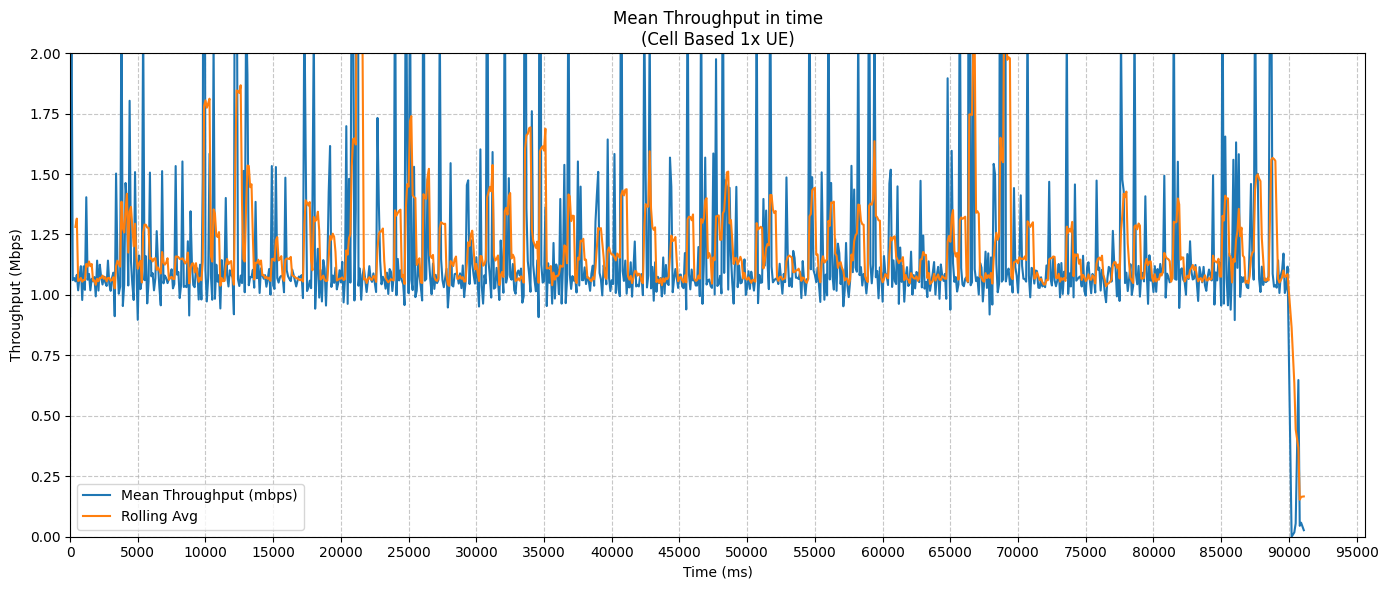

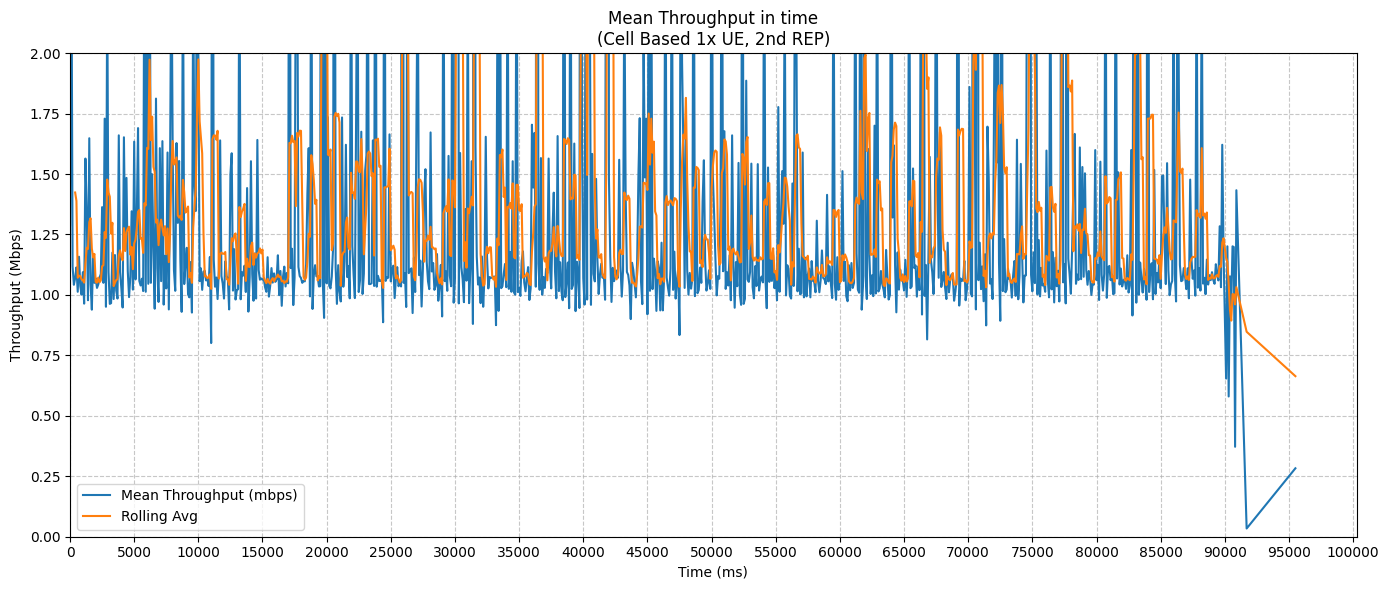

In [7]:
# Round of throughput values to 3 decimal places
df_cb_1["Mean_Throughput"] = df_cb_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_1["Rolling Avg (Mbps)"] = df_cb_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df_cb_1, label="Mean Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_1, label="Rolling Avg")
plt.title("Mean Throughput in time\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Round of throughput values to 3 decimal places
df_cf_1["Mean_Throughput"] = df_cf_1["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_1["Rolling Avg (Mbps)"] = df_cf_1["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df_cf_1, label="Mean Throughput (mbps)")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_1, label="Rolling Avg")
plt.title("Mean Throughput in time\n(Cell Based 1x UE, 2nd REP)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
print(df_cb_1["Mean_Throughput"].describe())
print(df_cf_1["Mean_Throughput"].describe())

count    907.000000
mean       1.191353
std        0.445191
min        0.000000
25%        1.036000
50%        1.073000
75%        1.129000
max        5.880000
Name: Mean_Throughput, dtype: float64
count    911.000000
mean       1.369665
std        0.884227
min        0.034000
25%        1.025000
50%        1.079000
75%        1.229000
max       10.290000
Name: Mean_Throughput, dtype: float64


## 10X Scenarios

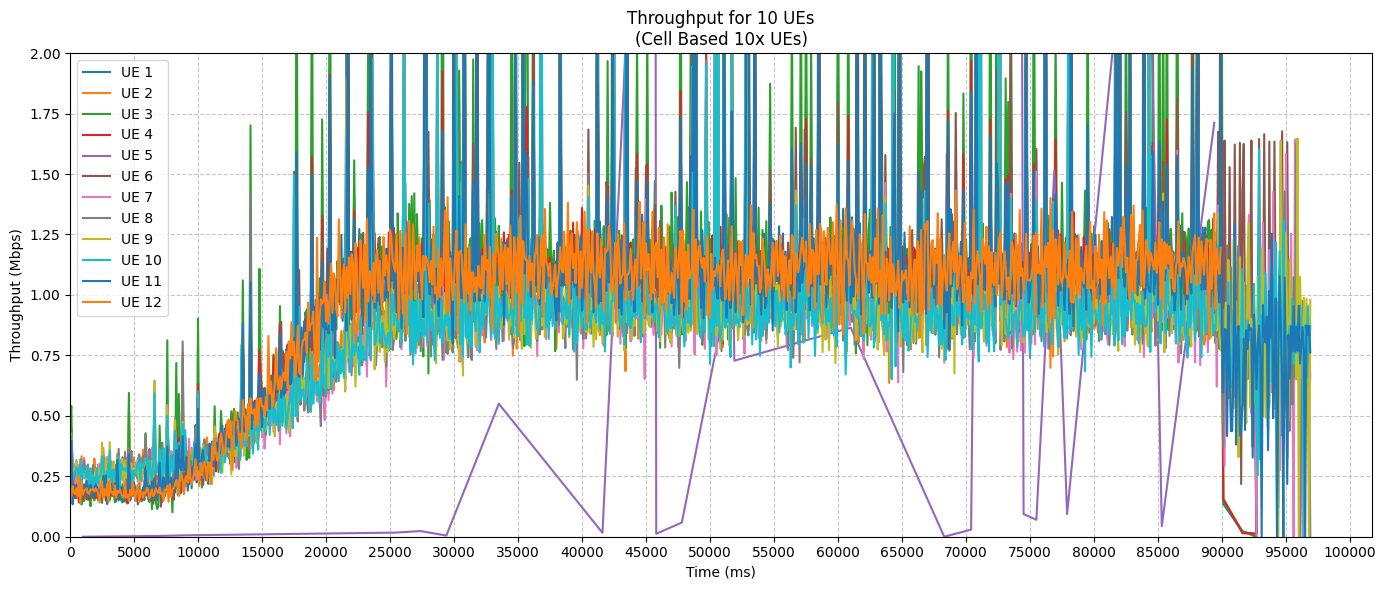

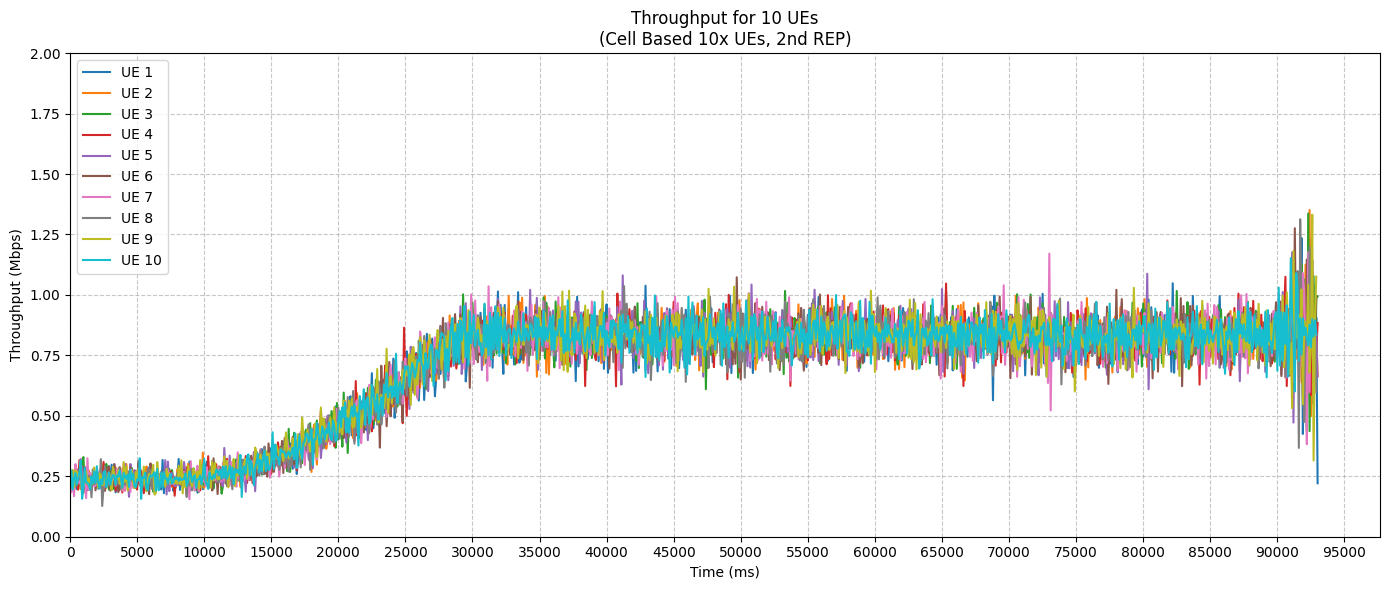

In [10]:
# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cb_10.items():
    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")
plt.title("Throughput for 10 UEs\n(Cell Based 10x UEs)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
for ue, df in dfs_cf_10.items():
    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")
plt.title("Throughput for 10 UEs\n(Cell Based 10x UEs, 2nd REP)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
df_cb_10 = pd.read_csv(cb_10x)
df_cf_10 = pd.read_csv(cf_10x)

print(df_cb_10["Mean_Throughput"].describe())
print(df_cf_10["Mean_Throughput"].describe())


count    10334.000000
mean         0.969914
std          0.603559
min          0.000000
25%          0.792531
50%          0.968837
75%          1.108778
max         16.888570
Name: Mean_Throughput, dtype: float64
count    9305.000000
mean        0.694961
std         0.237921
min         0.126890
25%         0.559074
50%         0.794759
75%         0.858258
max         1.351085
Name: Mean_Throughput, dtype: float64


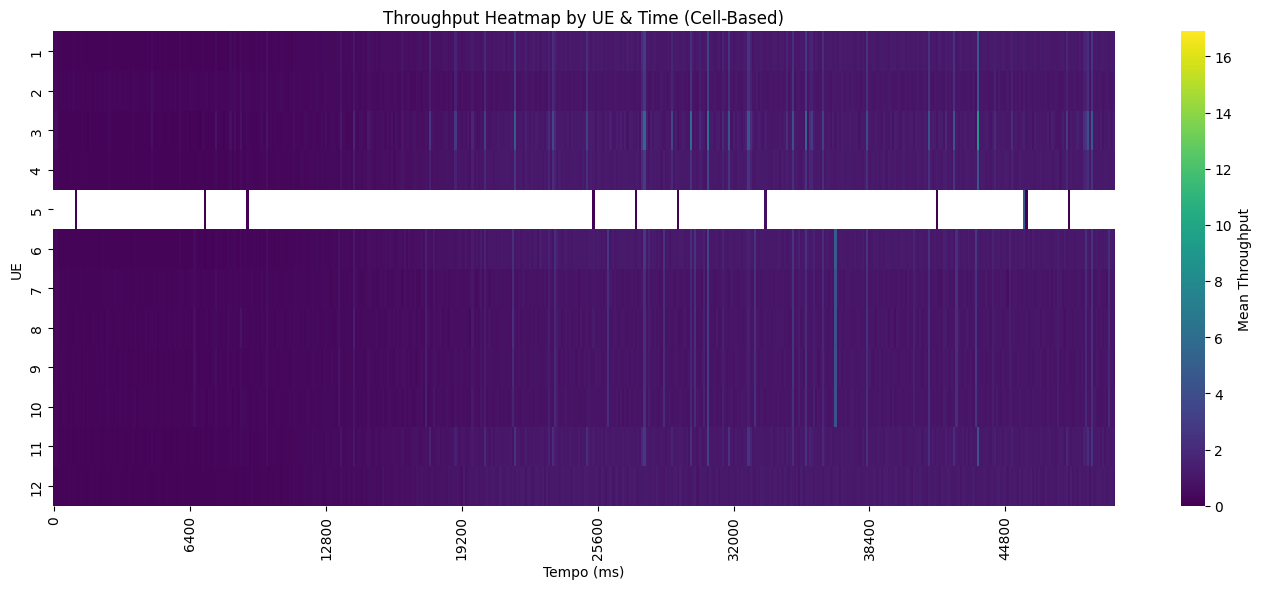

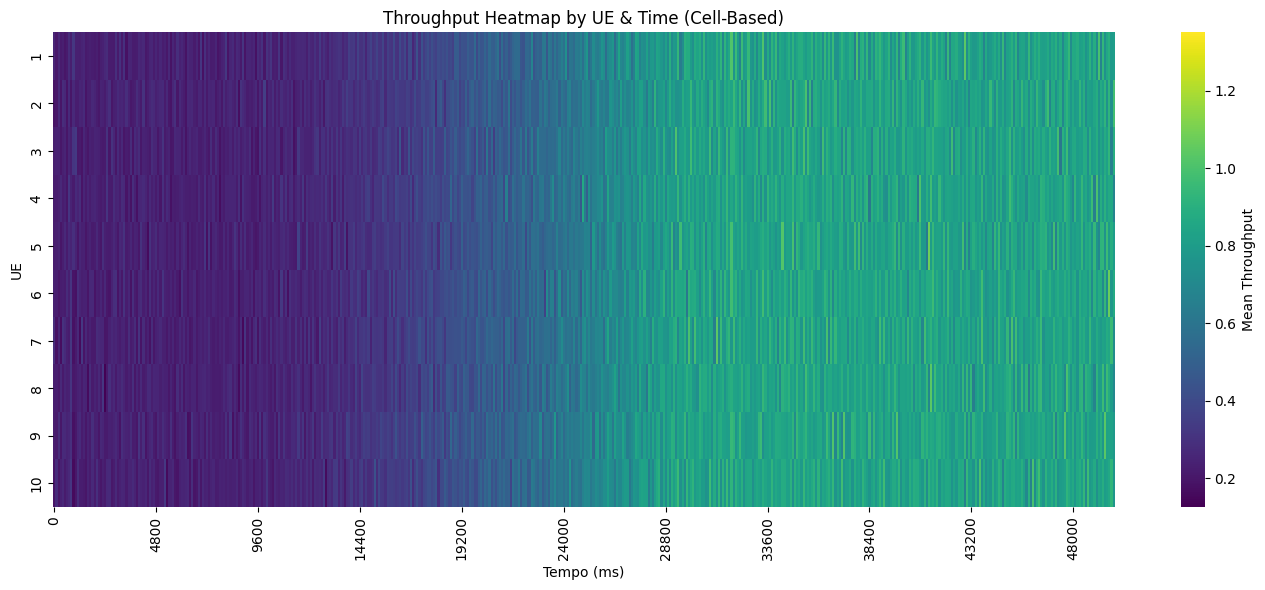

In [12]:

heat_cb = df_cb_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")
heat_cf = df_cf_10.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean Throughput'})
plt.title("Throughput Heatmap by UE & Time (Cell-Based)")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

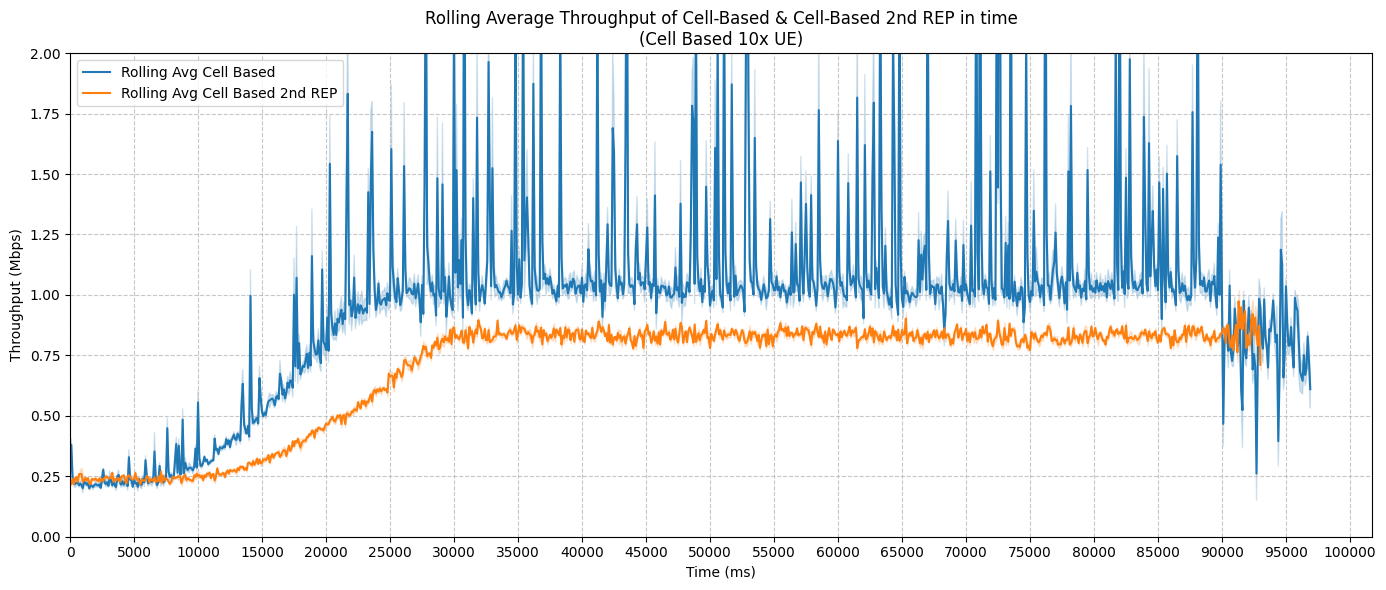

In [14]:
# Round of throughput values to 3 decimal places
df_cb_10["Mean_Throughput"] = df_cb_10["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_10["Rolling Avg (Mbps)"] = df_cb_10["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_10["Mean_Throughput"] = df_cf_10["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_10["Rolling Avg (Mbps)"] = df_cf_10["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_10, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_10, label="Rolling Avg Cell Based 2nd REP")
plt.title("Rolling Average Throughput of Cell-Based & Cell-Based 2nd REP in time\n(Cell Based 10x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()